In [64]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [65]:
df_up = pd.read_csv("../data/5_yr_data/UP5_years.csv")
df_up['datetime'] = pd.to_datetime(df_up['date'])
df_up.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df_up.sort_values(by="datetime", ascending=True, inplace=True)
df_up.head()

,district_name,market_name,commodity,variety,grade,min_rs_quintal,max_rs_quintal,modal_rs_quintal,date,year,month,day_of_month,datetime
714742,Bijnor,Bijnaur,Onion,Red,FAQ,2950.0,3040.0,3000.0,01 Jan 2018,2018,Jan,1,2018-01-01
433767,Mau(Maunathbhanjan),Kopaganj,Wheat,Dara,FAQ,1525.0,1625.0,1575.0,01 Jan 2018,2018,Jan,1,2018-01-01
439485,Gorakhpur,Gorakhpur,Wheat,Dara,FAQ,1560.0,1590.0,1575.0,01 Jan 2018,2018,Jan,1,2018-01-01
83163,Shahjahanpur,Tilhar,Potato,Potato,FAQ,490.0,510.0,500.0,01 Jan 2018,2018,Jan,1,2018-01-01
730321,Bulandshahar,Divai,Onion,Red,FAQ,2800.0,3000.0,2900.0,01 Jan 2018,2018,Jan,1,2018-01-01


In [66]:
TRAIN_LEN = int(0.8 * len(df_up))
up_train,up_test = (df_up[:TRAIN_LEN],df_up[TRAIN_LEN:])
up_train.set_index('datetime', inplace=True)
up_train.sort_index(inplace=True)
up_test.set_index('datetime', inplace=True)
up_test.sort_index(inplace=True)

In [67]:
y_hat = df_up.copy()
y_hat['sma'] = y_hat['modal_rs_quintal'].rolling(12).mean()
y_hat["sma"][TRAIN_LEN:] = y_hat['sma'][TRAIN_LEN-1]

/tmp/ipykernel_140507/1902968608.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  y_hat["sma"][TRAIN_LEN:] = y_hat['sma'][TRAIN_LEN-1]
/tmp/ipykernel_140507/1902968608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [68]:
def create_sma_plot(df_train,df_test,df,commodity,column,resultColName,resultType):    
    plt.figure(figsize=(12,4))
    mpl.rcParams['agg.path.chunksize'] = 10000

    plt.plot(df_train[column], label='Train')
    plt.plot(df_test[column], label='Test')
    plt.plot(df[resultColName+'_'+commodity], label=resultType)
    plt.legend(loc='best')
    plt.title(resultType+commodity)
    plt.show()

In [69]:
from sklearn.metrics import mean_squared_error

def calculate_results(resultType,testSeries: pd.Series, predictSeries: pd.Series, train_len,commodity):
    rmse = np.sqrt(mean_squared_error(testSeries, predictSeries[train_len:])).round(2)
    mape = np.round(np.mean(np.abs(testSeries-predictSeries[train_len:])/testSeries)*100,2)
    results = pd.DataFrame({'Method':[resultType+'_'+commodity], 'RMSE': [rmse],'MAPE': [mape] })
    return results

/tmp/ipykernel_140507/3537074728.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  y_hat_dt["sma_" + commodity][TRAIN_LEN:] = y_hat_dt['sma_'+commodity][TRAIN_LEN-1]
/tmp/ipykernel_140507/3537074728.py:20: SettingWithCopyWarning: 
A value

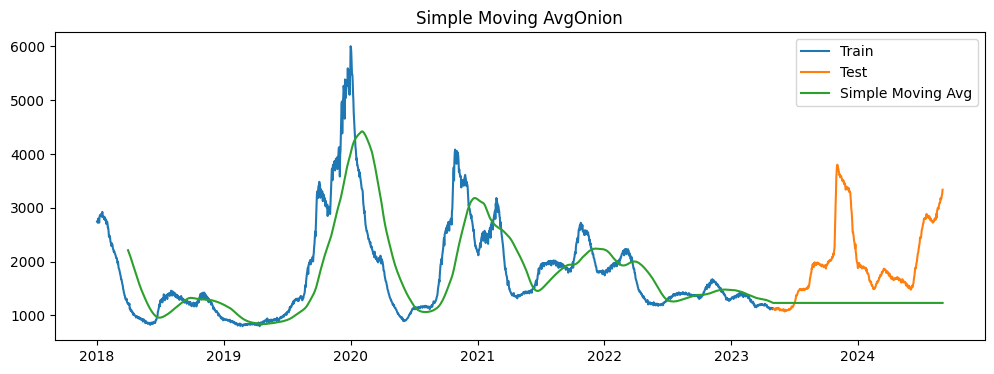

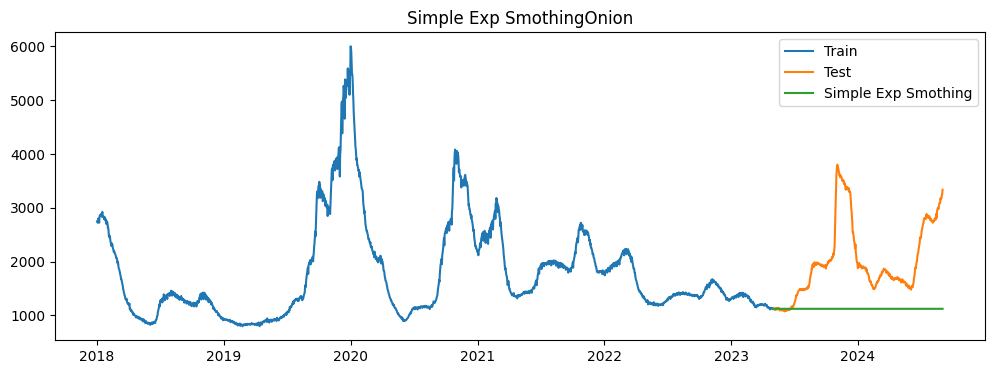

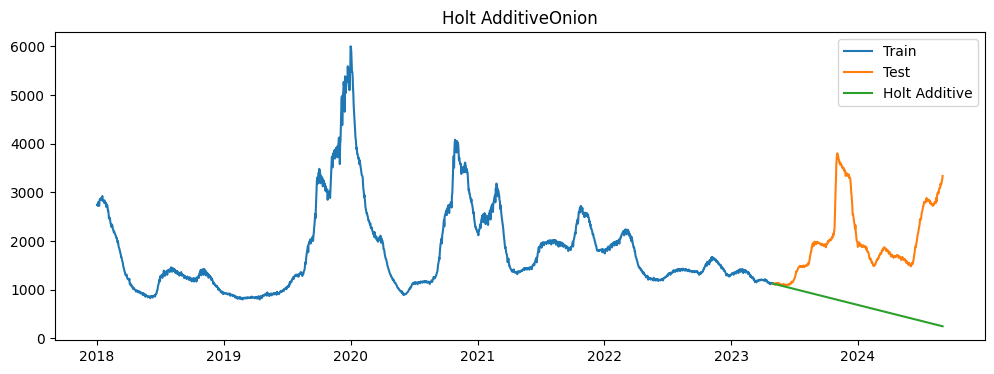

/tmp/ipykernel_140507/3537074728.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  y_hat_dt["sma_" + commodity][TRAIN_LEN:] = y_hat_dt['sma_'+commodity][TRAIN_LEN-1]
/tmp/ipykernel_140507/3537074728.py:20: SettingWithCopyWarning: 
A value

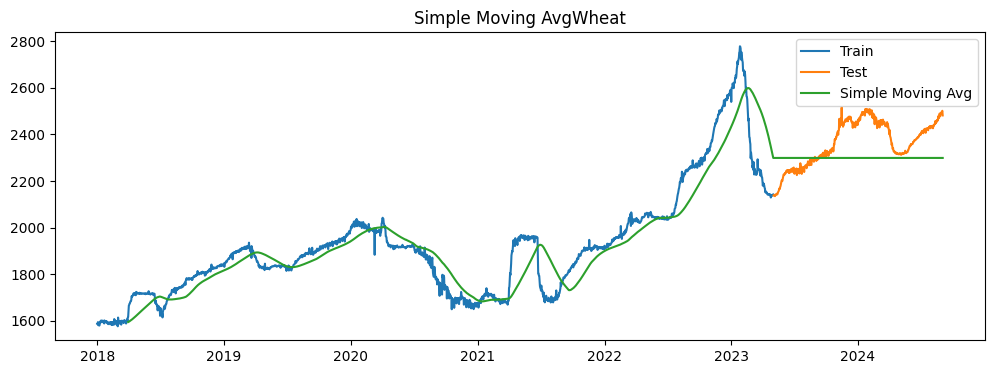

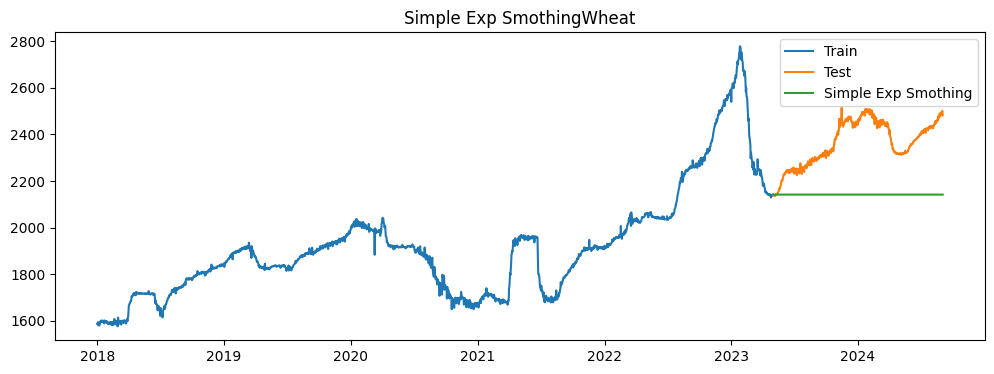

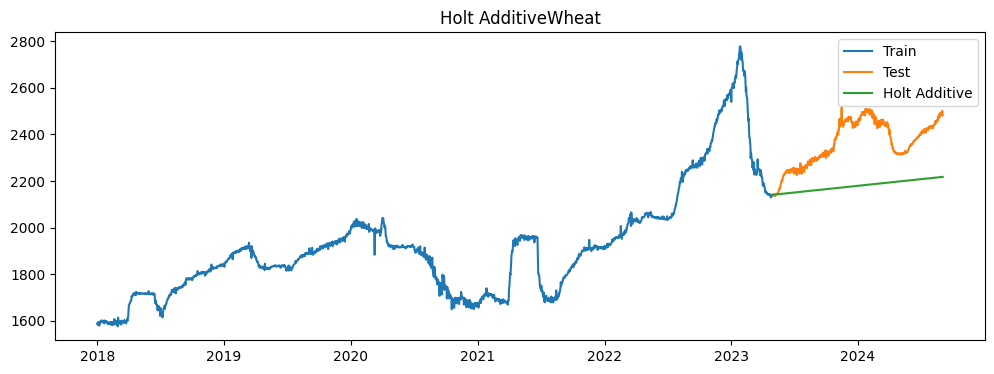

/tmp/ipykernel_140507/3537074728.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  y_hat_dt["sma_" + commodity][TRAIN_LEN:] = y_hat_dt['sma_'+commodity][TRAIN_LEN-1]
/tmp/ipykernel_140507/3537074728.py:20: SettingWithCopyWarning: 
A value

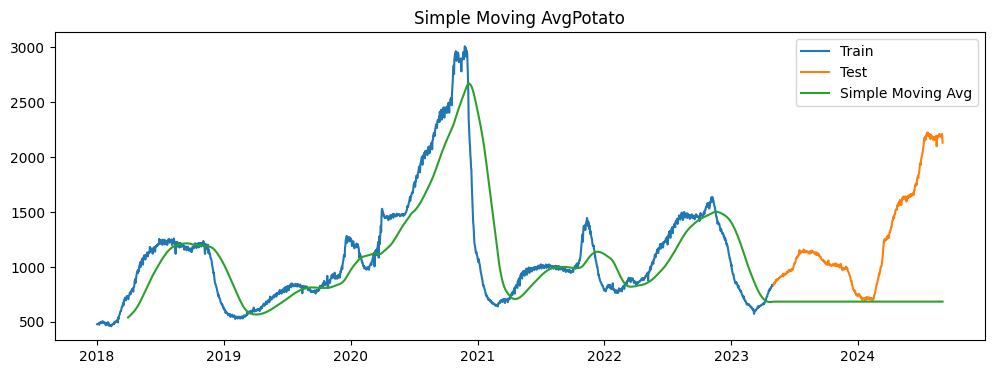

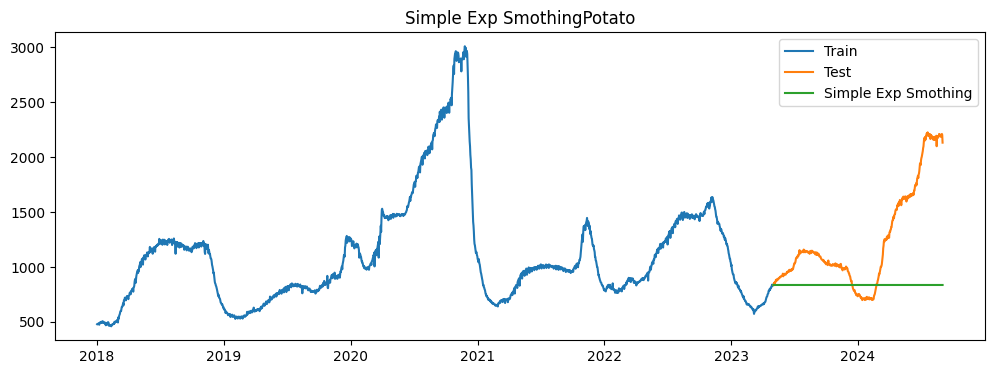

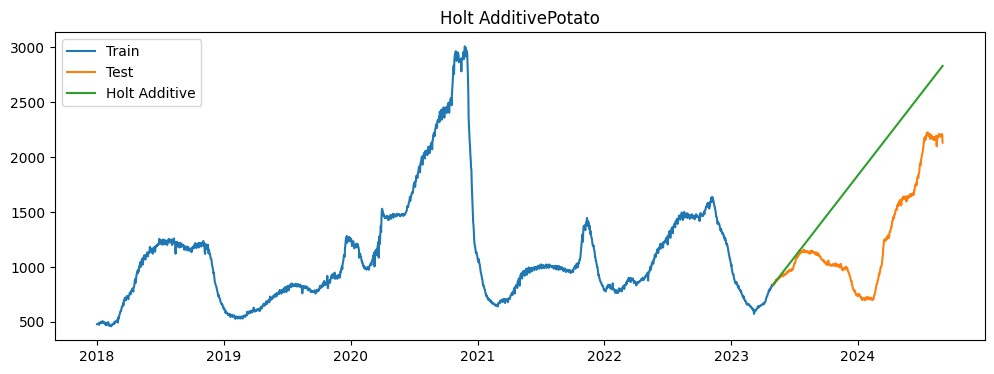

/tmp/ipykernel_140507/3537074728.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  y_hat_dt["sma_" + commodity][TRAIN_LEN:] = y_hat_dt['sma_'+commodity][TRAIN_LEN-1]
/tmp/ipykernel_140507/3537074728.py:20: SettingWithCopyWarning: 
A value

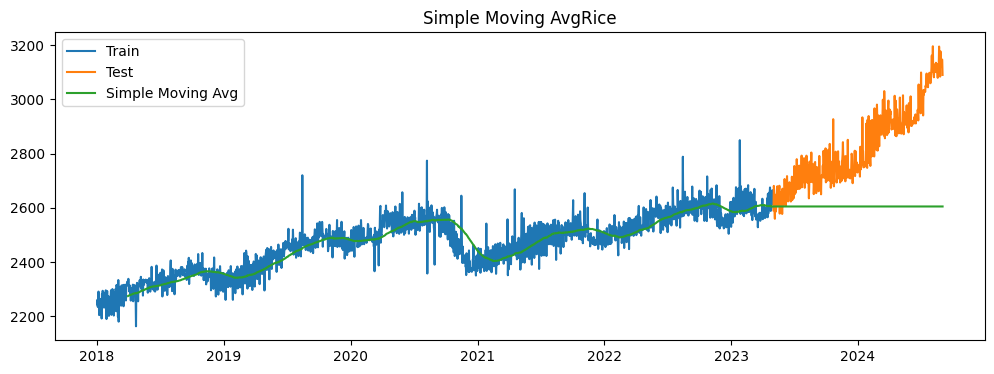

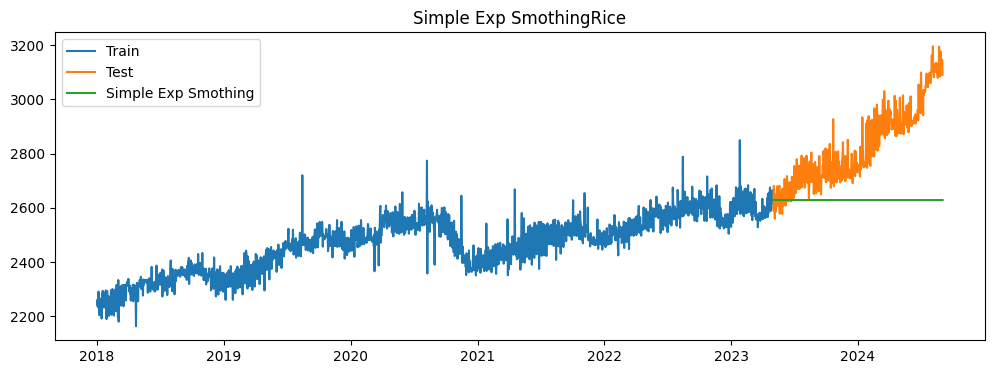

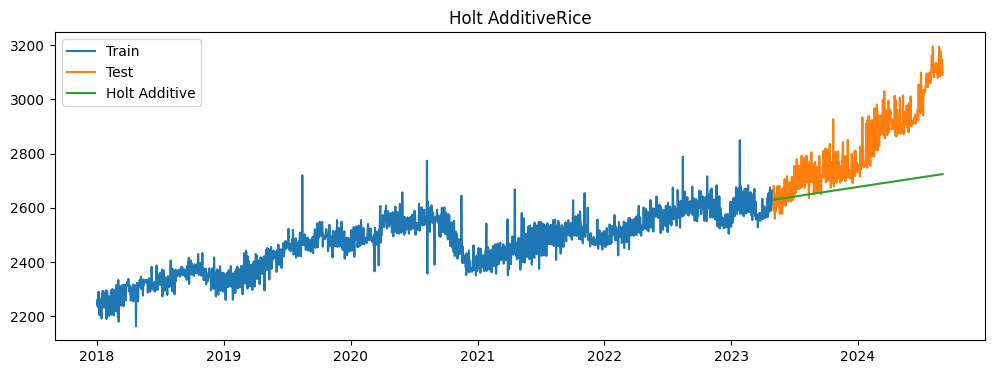

Result                  Method     RMSE   MAPE
0             SMA_Onion  1036.66  34.15
0             SES_Onion  1120.66  37.98
0   Holt Additive_Onion  1560.00  59.52
0             SMA_Wheat   115.80   4.04
0             SES_Wheat   242.31   9.27
0   Holt Additive_Wheat   202.38   7.70
0            SMA_Potato   721.35  38.38
0            SES_Potato   611.12  28.70
0  Holt Additive_Potato   707.30  55.58
0              SMA_Rice   266.42   7.71
0              SES_Rice   246.86   6.93
0    Holt Additive_Rice   193.36   5.28


In [70]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing

results = pd.DataFrame()
commodities = df_up['commodity'].unique()
for commodity in commodities:
    df_up_commodity = df_up[df_up.commodity == commodity]
    df_up_commodity.reset_index(inplace=True,drop=True)
    df_up_commodity_gb = df_up_commodity.groupby(['datetime']).agg({"modal_rs_quintal": "mean"}).reset_index()
    TRAIN_LEN = int(0.8 * len(df_up_commodity_gb ))
    up_train,up_test = (df_up_commodity_gb[:TRAIN_LEN] ,df_up_commodity_gb[TRAIN_LEN:])
    up_train.set_index('datetime', inplace=True)
    up_train.sort_index(inplace=True)
    up_test.set_index('datetime', inplace=True)
    up_test.sort_index(inplace=True)

    y_hat = df_up_commodity.copy()
    y_hat.set_index("datetime", inplace=True)
    y_hat_dt = y_hat.groupby('datetime').agg({"modal_rs_quintal": "mean"}).reset_index()
    y_hat_dt['sma_'+commodity] = y_hat_dt['modal_rs_quintal'].rolling(90).mean()
    y_hat_dt["sma_" + commodity][TRAIN_LEN:] = y_hat_dt['sma_'+commodity][TRAIN_LEN-1]

    simpex_model = SimpleExpSmoothing(y_hat_dt['modal_rs_quintal'][:TRAIN_LEN])
    simpex_model_fit = simpex_model.fit(optimized=True)

    y_hat_dt['simpex_'+commodity] = simpex_model_fit.forecast(len(y_hat_dt)-TRAIN_LEN)
    y_hat_dt.set_index("datetime",inplace=True)

    exp_model = ExponentialSmoothing(y_hat_dt['modal_rs_quintal'][:TRAIN_LEN],seasonal_periods=90,trend='additive')
    exp_model_fit = exp_model.fit(optimized=True)
    y_hat_dt['holt_additive_'+commodity] = exp_model_fit.forecast(len(y_hat_dt)-TRAIN_LEN)
    
    tempResults = calculate_results("SMA",up_test["modal_rs_quintal"],y_hat_dt["sma_"+commodity],TRAIN_LEN,commodity)
    results = pd.concat([results, tempResults])

    tempResults = calculate_results("SES",up_test['modal_rs_quintal'],y_hat_dt['simpex_'+commodity],TRAIN_LEN,commodity)
    results = pd.concat([results, tempResults])

    tempResults = calculate_results("Holt Additive",up_test['modal_rs_quintal'],y_hat_dt['holt_additive_'+commodity],TRAIN_LEN,commodity)
    results = pd.concat([results, tempResults])

    results = results[['Method', 'RMSE', 'MAPE']]

    create_sma_plot(up_train,up_test,y_hat_dt,commodity,"modal_rs_quintal","sma","Simple Moving Avg")
    create_sma_plot(up_train,up_test,y_hat_dt,commodity,"modal_rs_quintal","simpex","Simple Exp Smothing")
    create_sma_plot(up_train,up_test,y_hat_dt,commodity,"modal_rs_quintal","holt_additive","Holt Additive")
    
print("Result",results)